In [4]:
# import the necessary packages
import utils
import pandas as pd

# Miller OTA: Frequency-Compensation Design Techniques

## Breadboard Configuration

The Miller OTA circuit is constructed using the MOSbius Chip and characterized using ADI's ADALM2000. The necessary pin connections are made on a breadboard connected to the MOSbius PCB as shown below. The configuration is derived from the LTspice schematic designed using the MOSbius Spice Library.

<br>

![Mobius Miller OTA Breadboard Configuration](./img/inverting-bboard-layout-annotated.png)

***Figure 1:*** *Mobius Miller OTA Breadboard Configuration*


## Frequency Compensation Design Techniques

### Exploring the Effect of Rm on Miller Compensation

The closed-loop AC response of the inverting amplifier made using the Miller OTA is characterized below for both Rm = 0Ω and Rm = 750Ω. The closed-loop gain is set to -10V/V using external resistors values: R1fb = 100kΩ and R2fb =1MΩ. The response from the LTspice simulation is plotted alongside the results obtained from Scopy — the ADALM2000's user interface.

The Scopy data for Rm=0 (green) and Rm=750 (orange), obtained from the Network Analyzer module, show the expected **relative** effect of Rm on the phase margin — the addition of Rm moves the RHP zero introduced by Cm to the LHP and consequently adds phase where the RHP zero subtracts phase. We see that the phase of the Rm=750Ω case (orange) flattens off while the phase of the Rm=0Ω case (green) continues to decrease.

 ***However***, there is a discrepancy between the simulation results and the measured results. While the location of the dominant pole appears to agree, it seems as if the miller-zero is shifted to a higher frequency and that there is an additional pole in the measured response, relative to the simulation results. *This remains to be explored further.*

 *The phase-margin presented in the table below is approximated from the measured phase of the closed-loop response at unity-gain; this assumes the closed-loop response follows the open-loop response beyond the closed-loop 3dB bandwidth.*

In [7]:
# Create measured dataframes from scopy csv files
scopy_inputf0 = 'data/ScopyNA-wBfr-Rm0-Cm2200p-Cl680p-250Hz-1MHz.csv'
scopy_inputf1 = 'data/ScopyNA-wBfr-Rm680-Cm2200p-Cl680p-250Hz-1MHz.csv'
scopy_inputfiles = [scopy_inputf0, scopy_inputf1]
mota_scpy_rm0_Cc2200p_Cl680p_df, mota_scpy_rm750_Cc2200p_Cl680p_df = utils.scopycsvf_to_pd(scopy_inputfiles)

data/ScopyNA-wBfr-Rm0-Cm2200p-Cl680p-250Hz-1MHz.csv
data/ScopyNA-wBfr-Rm680-Cm2200p-Cl680p-250Hz-1MHz.csv


In [6]:
# Create simulated dataframes from LTspice .txt files
ltspice_inputf0 = 'data/LTspice-Rm0-Cc2200p-Cl680p-cl2.txt'
ltspice_inputf1 = 'data/LTspice-Rm750-Cc2200p-Cl680p-cl2.txt'
ltspice_inputfiles = [ltspice_inputf0, ltspice_inputf1]
mota_ltspice_rm0_Cc2200p_Cl680p_df, mota_ltspice_rm750_Cc2200p_Cl680p_df = utils.spicetxtf_to_pd(ltspice_inputfiles)


In [8]:
# Add Mag and Phase compensation at data stitch (10kHz)
mota_scpy_rm0_acd_df_stitchcmp = mota_scpy_rm0_Cc2200p_Cl680p_df.copy()
mota_scpy_rm0_acd_df_stitchcmp.loc[mota_scpy_rm0_acd_df_stitchcmp['Frequency'] > 10000, 'Magnitude'] += 2
mota_scpy_rm0_acd_df_stitchcmp.loc[mota_scpy_rm0_acd_df_stitchcmp['Frequency'] > 10000, 'Phase'] += 3.5

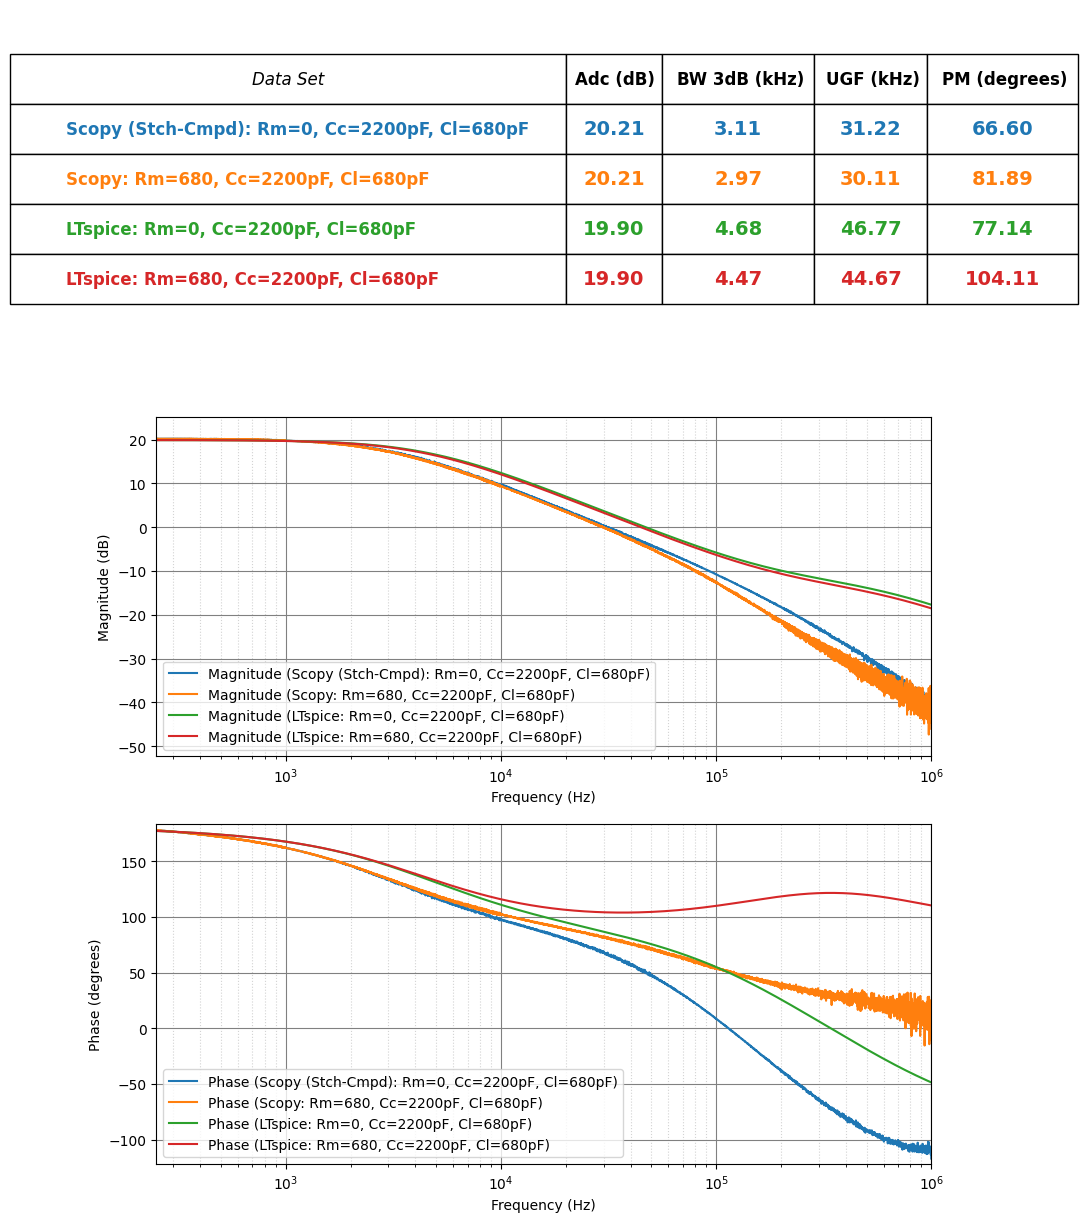

In [9]:
# Plot the AC response (Scopy: Rm=0, Cc=2200pF, Cl=680pF), (LTspice: Rm=750, Cc=2200pF, Cl=680pF), (LTspice: Rm=0, Cc=2200pF, Cl=680pF
names = ['Scopy (Stch-Cmpd): Rm=0, Cc=2200pF, Cl=680pF','Scopy: Rm=680, Cc=2200pF, Cl=680pF','LTspice: Rm=0, Cc=2200pF, Cl=680pF','LTspice: Rm=680, Cc=2200pF, Cl=680pF']
utils.plot_acresponse([mota_scpy_rm0_acd_df_stitchcmp,mota_scpy_rm750_Cc2200p_Cl680p_df, mota_ltspice_rm0_Cc2200p_Cl680p_df, mota_ltspice_rm750_Cc2200p_Cl680p_df ], names)